<a href="https://colab.research.google.com/github/dinethpiyumantha/Handwritten-Number-Predictor/blob/master/Handwritten_Number_Prediction_Model_(CNN)_MNIST_With_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# install libs
!pip install tensorflow
!pip install pillow
!pip install numpy

In [41]:
# imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [42]:
# load mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels)
print(test_images.shape, test_labels)

(60000, 28, 28) [5 0 4 ... 5 6 8]
(10000, 28, 28) [7 2 1 ... 4 5 6]


In [43]:
# reshape and normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [44]:
# encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels)
print(test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
# build model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [46]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
# train the model
model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/20
938/938 [==============================] - 7s 6ms/step - loss: 0.1930 - accuracy: 0.9399 - val_loss: 0.0559 - val_accuracy: 0.9823
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0539 - accuracy: 0.9832 - val_loss: 0.0313 - val_accuracy: 0.9903
Epoch 3/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0370 - val_accuracy: 0.9884
Epoch 4/20
938/938 [==============================] - 8s 9ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0301 - val_accuracy: 0.9903
Epoch 5/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0278 - val_accuracy: 0.9909
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0262 - val_accuracy: 0.9922
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0163 - accuracy: 0.9944 - val_loss: 0.0300 - val_accuracy: 0.9905
Epoch 

In [48]:
# summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [49]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9923
Test accuracy: 0.9922999739646912


In [50]:
# save the model
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Usage

In [51]:
# imports
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [52]:
# load the model
model = load_model('model.h5')

--2024-02-08 15:26:24--  https://www.clipartmax.com/png/middle/96-965294_2-hand-written-number-2.png
Resolving www.clipartmax.com (www.clipartmax.com)... 203.161.57.106
Connecting to www.clipartmax.com (www.clipartmax.com)|203.161.57.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127645 (125K) [image/png]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 124.65K   342KB/s    in 0.4s    

2024-02-08 15:26:26 (342 KB/s) - ‘image.jpg’ saved [127645/127645]



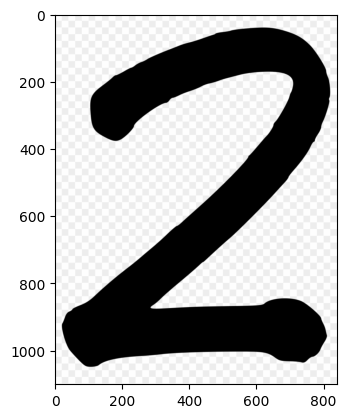

In [61]:
# download an image
!wget https://www.clipartmax.com/png/middle/96-965294_2-hand-written-number-2.png -O image.jpg

image = Image.open("image.jpg").convert('L')
plt.imshow(image, cmap='gray')
plt.show()

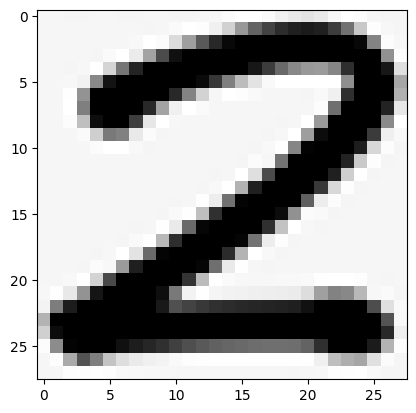

In [62]:
# load image and preprocess
image = Image.open("image.jpg").convert('L')
image = image.resize((28, 28))
imageArray = np.array(image) / 255.0
imageArray = np.expand_dims(imageArray, axis=0)
imageArray = np.expand_dims(imageArray, axis=-1)
plt.imshow(image, cmap='gray')
plt.show()

In [66]:
# get prediction output

import numpy as np
predictions = model.predict(imageArray)
print("Result =", np.argmax(predictions))

1/1 [==============================] - 0s 29ms/step
Result = 2
